In [1]:
# Датасет Credit Card Fraud Detection Выявление мошеннических операций по кредитным картам.
# Только ~0.17% — мошенничество
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from google.colab import files

uploaded = files.upload()  # Откроется окно выбора файла
# После загрузки файл появится в текущей рабочей директории

Saving creditcard.csv to creditcard.csv


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


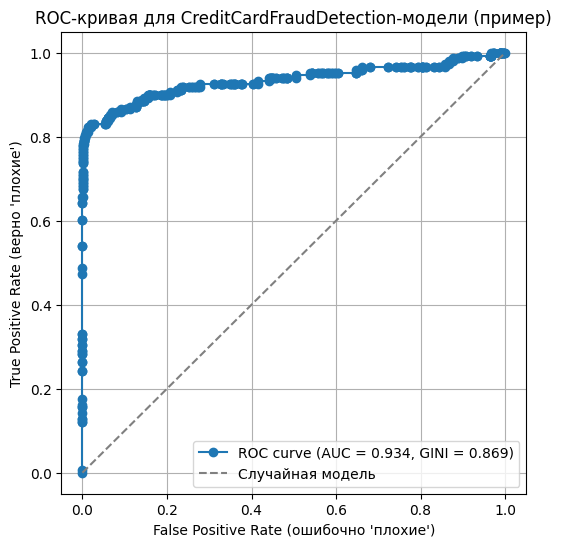

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('creditcard.csv')
print(df.head())
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# 4. Предсказания и метрики
y_pred_proba = model.predict_proba(X_test)[:, 1]

FPR, TPR, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(FPR, TPR)
gini = 2 * roc_auc - 1

# построим график
plt.figure(figsize=(6,6))
plt.plot(FPR, TPR, marker='o', label=f"ROC curve (AUC = {roc_auc:.3f}, GINI = {gini:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Случайная модель")
plt.title("ROC-кривая для CreditCardFraudDetection-модели (пример)")
plt.xlabel("False Positive Rate (ошибочно 'плохие')")
plt.ylabel("True Positive Rate (верно 'плохие')")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

     Порог (threshold)  TPR (доля дефолтов)  FPR (доля недефолтов)  TPR - FPR
0                  inf                 0.00                    0.0       0.00
1         1.000000e+00                 0.01                    0.0       0.01
2         9.999969e-01                 0.12                    0.0       0.12
3         9.999966e-01                 0.12                    0.0       0.12
4         9.999960e-01                 0.13                    0.0       0.13
..                 ...                  ...                    ...        ...
330       3.379189e-08                 1.00                    1.0       0.00
331       3.296153e-08                 1.00                    1.0       0.00
332       1.464079e-08                 1.00                    1.0       0.00
333       1.434721e-08                 1.00                    1.0       0.00
334       1.883610e-15                 1.00                    1.0       0.00

[335 rows x 4 columns]
KS statistic: 0.810
KS достигается при п

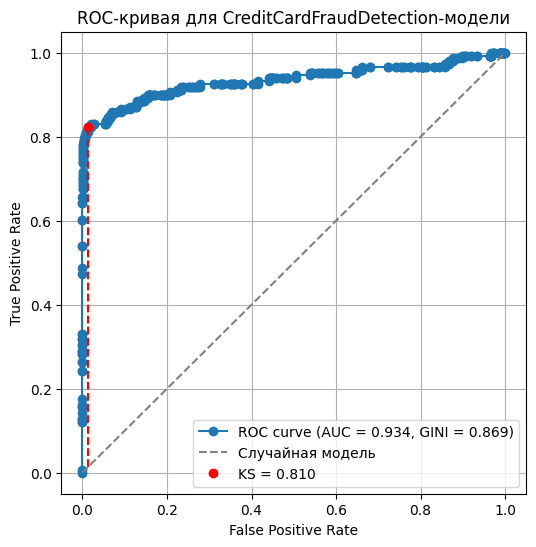

In [8]:
# Расчет KS
# Расчёт различий между TPR и FPR на каждом пороге
ks_values = TPR - FPR

# Максимальное значение KS и индекс, при котором оно достигается
KS = np.max(ks_values)
KS_idx = np.argmax(ks_values)
KS_threshold = thresholds[KS_idx]

# делаем таблицу для наглядности
ks_table = pd.DataFrame({
    "Порог (threshold)": thresholds,
    "TPR (доля дефолтов)": TPR.round(2),
    "FPR (доля недефолтов)": FPR.round(2),
    "TPR - FPR": ks_values.round(2)
})

ks_table, KS, KS_threshold
print(ks_table)
print(f"KS statistic: {KS:.3f}")
print(f"KS достигается при пороге: {KS_threshold:.3f}")
plt.figure(figsize=(6,6))
plt.plot(FPR, TPR, marker='o', label=f"ROC curve (AUC = {roc_auc:.3f}, GINI = {gini:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Случайная модель")

# Отметка точки максимального KS
plt.plot(FPR[KS_idx], TPR[KS_idx], 'ro', label=f"KS = {KS:.3f}")
plt.vlines(FPR[KS_idx], ymin=FPR[KS_idx], ymax=TPR[KS_idx], colors='red', linestyles='--')

plt.title("ROC-кривая для CreditCardFraudDetection-модели")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

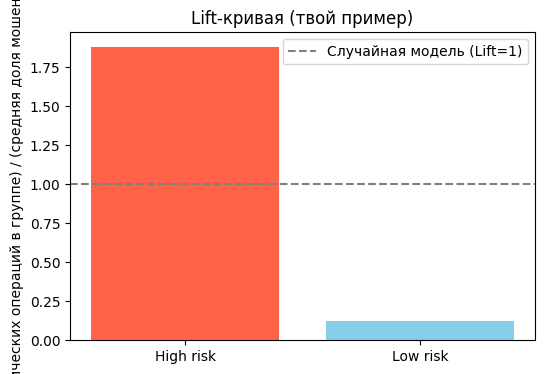

,group,count,sum,fraud_rate,Lift
0,High risk,42722,139,0.003254,1.878356
1,Low risk,42721,9,0.000211,0.121623


In [13]:
# сортировка (от большего к меньшему)
data = pd.DataFrame({
    'y_test': y_test,
    'y_pred_proba': y_pred_proba
})
data = data.sort_values('y_pred_proba', ascending=False).reset_index(drop=True)

# создаём 2 группы (верхняя половина и нижняя)
data['group'] = np.where(data.index < len(data)/2, 'High risk', 'Low risk')

# доля мошеннических операций в каждой группе
group_stats = data.groupby('group')['y_test'].agg(['count', 'sum'])
group_stats['fraud_rate'] = group_stats['sum'] / group_stats['count']

# общий уровень мошеннических операций
overall_rate = data['y_test'].mean()

# lift = отношение мошеннических операций группы к среднему
group_stats['Lift'] = group_stats['fraud_rate'] / overall_rate
group_stats = group_stats.reset_index()

# график
plt.figure(figsize=(6,4))
plt.bar(group_stats['group'], group_stats['Lift'], color=['tomato','skyblue'])
plt.axhline(1, color='gray', linestyle='--', label='Случайная модель (Lift=1)')
plt.title("Lift-кривая (твой пример)")
plt.ylabel("Lift = (доля мошеннических операций в группе) / (средняя доля мошеннических операций)")
plt.legend()
plt.show()

group_stats